---

#Ma513. - Hands on Machine Learning for cybersecurity (2023/2024)


#Project : Securing user authentication
---

DB2 DSN2009

## Import and mount

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/Ma513/Project/')



ModuleNotFoundError: No module named 'google.colab'

In [3]:
df = pd.read_csv('StrongPasswordData.csv') #Read the file StrongPasswordData.csv and create the dataframe df

In [4]:
df.head() #Display the first 5 rows of the csv

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


## GRAPH  

test of display to get an idea of how a graph can give a better understanding of the possible outliers

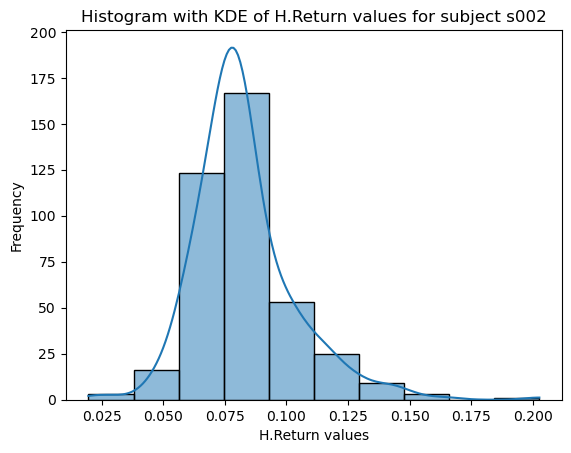

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extracting samples for subject 's002'
subject_1_samples = df.loc[df['subject'] == 's002', 'H.Return']

# Plotting histogram with kernel density estimate
sns.histplot(subject_1_samples, kde=True, bins=10, edgecolor='black')
plt.title('Histogram with KDE of H.Return values for subject s002')
plt.xlabel('H.Return values')
plt.ylabel('Frequency')
plt.show()


We try it but with a widder range of values in order to get a glance of the differences between two individuals ont the same data

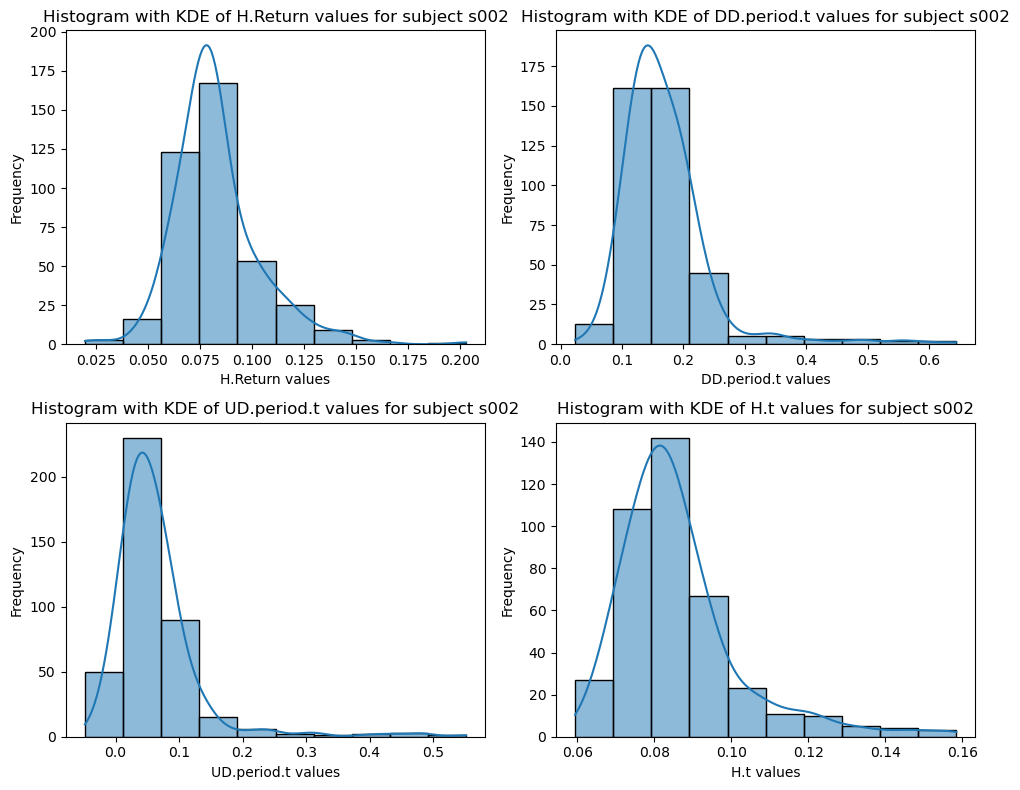

In [6]:
columns_to_plot = ['H.Return', 'DD.period.t','UD.period.t','H.t']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms with KDE for each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(df.loc[df['subject'] == 's002', column], kde=True, bins=10, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram with KDE of {column} values for subject s002')
    axes[i].set_xlabel(f'{column} values')
    axes[i].set_ylabel('Frequency')
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

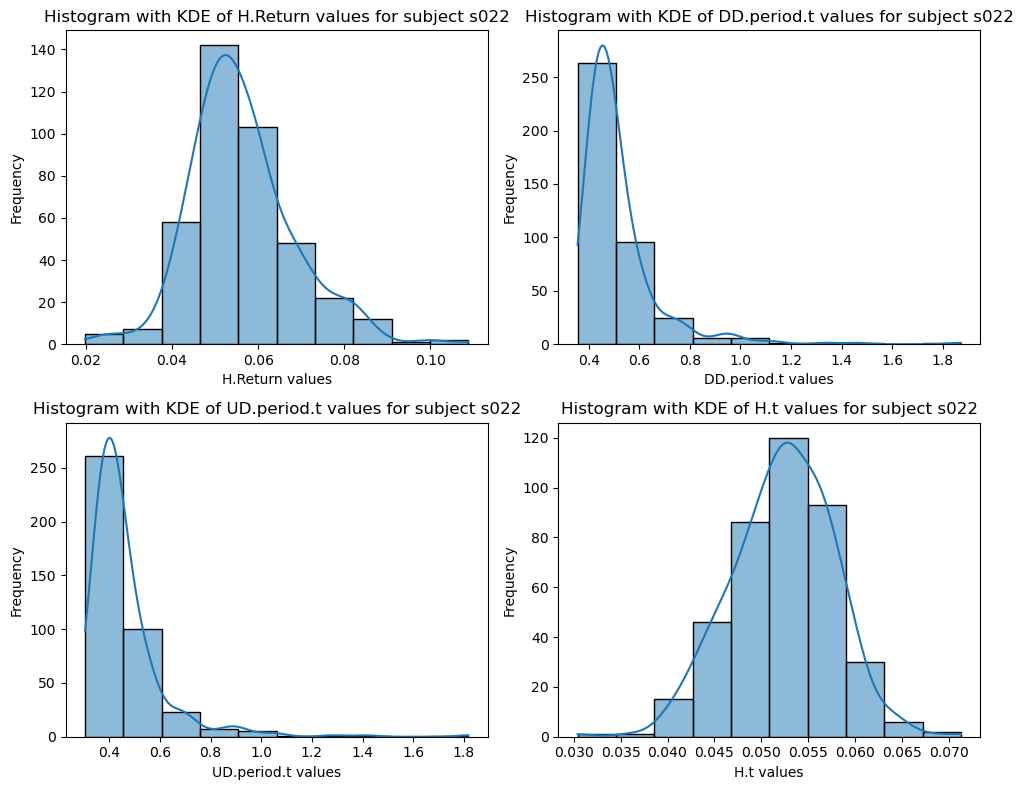

In [7]:
columns_to_plot = ['H.Return', 'DD.period.t','UD.period.t','H.t']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms with KDE for each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(df.loc[df['subject'] == 's022', column], kde=True, bins=10, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram with KDE of {column} values for subject s022')
    axes[i].set_xlabel(f'{column} values')
    axes[i].set_ylabel('Frequency')
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

We do observe a trong difference in shape between subject 2 and 22. The time stamp gave us a better understanding. Foe exemple while subject 2 has most of his DD.period.t between 0.1 and 0.2 second the subject 22 is much slower with a peak at 0.4, the difference between the two is huge.

It shows the value of using keystroke analysis in order to autentificate or not someone.

## SPLIT

In [8]:
#values_subject = df[['H.period', 'H.Return']]
df_x = df.loc[:, 'H.period':'H.Return']
df_y = df['subject']

In [9]:
df_x.head() #Display the 5 first rows of df_x

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [10]:
df_y.head() #Display the 5 first rows of df_y

0    s002
1    s002
2    s002
3    s002
4    s002
Name: subject, dtype: object

In [11]:
samples = df_x.values #Define the values of df_x as the variable samples
targets = df_y.values #Define the values of df_y as the variable targets

In [12]:
samples.shape #Give the shape of samples

(20400, 31)

In [13]:
samples.dtype #Give the type of the values contain in the variable samples

dtype('float64')

In [14]:
targets.shape #Give the shape of targets

(20400,)

In [15]:
targets.dtype #Give the type of the values contain in the variable targets

dtype('O')

In [16]:
#targets = np.array([int(s[1:]) for s in targets])

In [17]:
#We create a array with the values of targets. For each string 's' we delete the first character and then convert it to a float
targets = np.array([float(s[1:]) for s in targets])

In [18]:
targets.dtype #Give the type of the values contain in the variable targets

dtype('float64')

In [19]:
from sklearn.model_selection import train_test_split
#We split the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split( samples, targets, test_size=0.2, random_state=42)

In [20]:
#X_train.head()

In [21]:
#X_test.head()

In [22]:
#y_train.head()

In [23]:
#y_test.head()

## TRAIN

In [24]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Creation of data results
data_result = []

### DTC (Decision Tree Classifier)

Create and train the decision tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train) #We fit X_train and y_train

DecisionTreeClassifier()

Make predictions on the test set

In [27]:
#Using the decision tree classifier we predict values based on X_test
predictions_DTC = decision_tree_classifier.predict(X_test)

In [28]:
TorF_DTC = [] #Create the list TorF_DTC
for i in range(len(predictions_DTC)):
    '''For each value from predictions_DTC 
  if the value is egal to true label we add the string 'TRUE' to TorF_DTC
  if the value is not egal to the true label we add the string 'FALSE' to TorF_DTC'''
    if (y_test[i]==predictions_DTC[i]):
        TorF_DTC.append('TRUE')
    if (y_test[i]!=predictions_DTC[i]):
        TorF_DTC.append('FALSE')

In [29]:
#We create the dataframe "result_df_DTC" with 3 columns
result_df_DTC = pd.DataFrame({
    'True Values': y_test, #The first column is "True values" which contains the true labels
    'Predictions': predictions_DTC, #The second column is "Predictions" which contains the predictions made by the decision tree classifier
    'Results': TorF_DTC #The last column is "Results" which contains the values from TorF_DTC
})

print(result_df_DTC) #We print the dataframe "result_df_DTC"

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         15.0    TRUE
3            57.0         26.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0          8.0   FALSE
4076         57.0         37.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0         49.0    TRUE
4079         15.0         40.0   FALSE

[4080 rows x 3 columns]


Evaluate the classifier

In [30]:
'''We create three lists (graph_T_DTC, graph_F_DTC, and graph_X_DTC) 
    and three counters (graph_T0_DTC, graph_F0_DTC, and graph_X0_DTC) 
    to track the cumulative count of true positives, false positives, 
    and total predictions at each step of iterating through the predictions 
    made by the decision tree classifier (predictions_DTC)'''
graph_T_DTC = []
graph_F_DTC = []
graph_X_DTC = []
graph_T0_DTC = 0
graph_F0_DTC = 0
graph_X0_DTC = 0
for i in range(len(predictions_DTC)):
    if (y_test[i]==predictions_DTC[i]):
        graph_T0_DTC +=1
        graph_X0_DTC +=1
        graph_T_DTC.append(graph_T0_DTC)
        graph_F_DTC.append(graph_F0_DTC)
        graph_X_DTC.append(graph_X0_DTC)
    if (y_test[i]!=predictions_DTC[i]):
        graph_F0_DTC +=1
        graph_X0_DTC +=1
        graph_T_DTC.append(graph_T0_DTC)
        graph_F_DTC.append(graph_F0_DTC)
        graph_X_DTC.append(graph_X0_DTC)

In [31]:
print("True :",graph_T0_DTC) #Print the number of TRUE values
print("False :",graph_F0_DTC) #Print the number of FALSE values
print("X :",graph_X0_DTC) #Print the number of TRUE values in the case of a 100% accuracy
'''We calculate the accuracy of the decision tree classifier based on the cumulative counts 
of TRUE values (graph_T0_DTC) and FALSE values (graph_F0_DTC)'''
acc_DTC = graph_T0_DTC * 100 / (graph_T0_DTC + graph_F0_DTC) 
print('acc_DTC :',f'{acc_DTC:.2f}%') #Print the accuracy

True : 2944
False : 1136
X : 4080
acc_DTC : 72.16%


In [32]:
accuracy = accuracy_score(y_test, predictions_DTC) #Calculate the accuracy by comparing the true labels wiith the predicted labels
conf_matrix = confusion_matrix(y_test, predictions_DTC) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, predictions_DTC) #Create the classification report that display the precision, recall, F1-score and support for each class

In [33]:
# Display evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.72

Confusion Matrix:
[[37  0  3 ...  0  0  0]
 [ 3 41  3 ...  0  0  0]
 [ 1  8 44 ...  1  0  0]
 ...
 [ 1  0  0 ... 58  0  1]
 [ 0  0  1 ...  5 58  0]
 [ 0  0  1 ...  0  0 49]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.54      0.51      0.53        72
         3.0       0.57      0.59      0.58        69
         4.0       0.56      0.60      0.58        73
         5.0       0.78      0.85      0.81        73
         7.0       0.48      0.70      0.57        54
         8.0       0.57      0.48      0.52        87
        10.0       0.77      0.77      0.77        97
        11.0       0.68      0.77      0.72        75
        12.0       0.79      0.77      0.78        93
        13.0       0.55      0.67      0.60        72
        15.0       0.65      0.56      0.60        87
        16.0       0.74      0.69      0.72        85
        17.0       0.84      0.79      0.82        82
        18

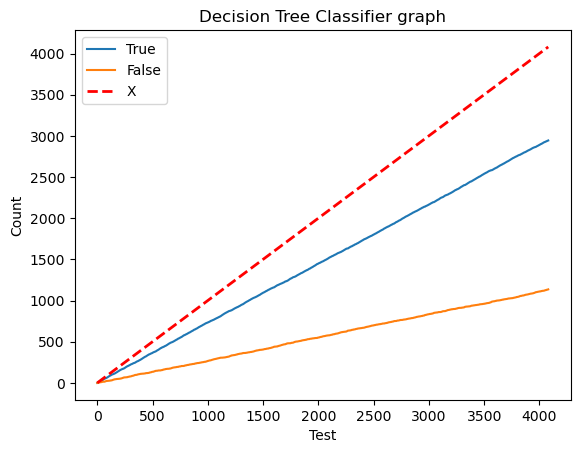

In [35]:
'''Create a plot representing the cumulative counts of TRUE values, 
FALSE values, and the values for a 100% accuracy at each step during 
the evaluation of the decision tree classifier'''
plt.plot(graph_T_DTC, label='True')
plt.plot(graph_F_DTC, label='False')
plt.plot(graph_X_DTC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('Decision Tree Classifier graph')
plt.show()

In [36]:
# Add the data to data result
data_result.append(['Decision Tree Classifier', accuracy]) 

### RFC (Random Forest Classifier)

Create and train the Random forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
randomforestC = RandomForestClassifier()
randomforestC.fit(X_train, y_train) #We fit X_train and y_train

RandomForestClassifier()

Make predictions on the test set

In [38]:
#Using the random forest classifier we predict values based on X_test
predictions_RFC = randomforestC.predict(X_test)

In [39]:
TorF_RFC = [] #Create the list TorF_RFC
for i in range(len(predictions_RFC)):
    '''For each value from predictions_RFC 
  if the value is egal to true label we add the string 'TRUE' to TorF_RFC
  if the value is not egal to the true label we add the string 'FALSE' to TorF_RFC'''
    if (y_test[i]==predictions_RFC[i]):
        TorF_RFC.append('TRUE')
    if (y_test[i]!=predictions_RFC[i]):
        TorF_RFC.append('FALSE')

In [40]:
#We create the dataframe "result_df_RFC" with 3 columns
result_df_RFC = pd.DataFrame({
    'True Values': y_test, #The first column is "True values" which contains the true labels
    'Predictions': predictions_RFC, #The second column is "Predictions" which contains the predictions made by the random forest classifier
    'Results': TorF_RFC #The last column is "Results" which contains the values from TorF_RFC
})

print(result_df_RFC) #We print the dataframe "result_df_FTC"

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         15.0    TRUE
3            57.0         21.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0         41.0    TRUE
4076         57.0         38.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0         49.0    TRUE
4079         15.0         15.0    TRUE

[4080 rows x 3 columns]


Evaluate the classifier

In [41]:
'''We create three lists (graph_T_RFC, graph_F_RFC, and graph_X_RFC) 
    and three counters (graph_T0_RFC, graph_F0_RFC, and graph_X0_RFC) 
    to track the cumulative count of true positives, false positives, 
    and total predictions at each step of iterating through the predictions 
    made by the random forest classifier (predictions_RFC)'''
graph_T_RFC = []
graph_F_RFC = []
graph_X_RFC = []
graph_T0_RFC = 0
graph_F0_RFC = 0
graph_X0_RFC = 0
for i in range(len(predictions_RFC)):
    if (y_test[i]==predictions_RFC[i]):
        graph_T0_RFC +=1
        graph_X0_RFC +=1
        graph_T_RFC.append(graph_T0_RFC)
        graph_F_RFC.append(graph_F0_RFC)
        graph_X_RFC.append(graph_X0_RFC)
    if (y_test[i]!=predictions_RFC[i]):
        graph_F0_RFC +=1
        graph_X0_RFC +=1
        graph_T_RFC.append(graph_T0_RFC)
        graph_F_RFC.append(graph_F0_RFC)
        graph_X_RFC.append(graph_X0_RFC)

In [42]:
print("True :",graph_T0_RFC) #Print the number of TRUE values
print("False :",graph_F0_RFC) #Print the number of FALSE values
print("X :",graph_X0_RFC) #Print the number of TRUE values in the case of a 100% accuracy
'''We calculate the accuracy of the random forest classifier based on the cumulative counts 
of TRUE values (graph_T0_RFC) and FALSE values (graph_F0_RFC)'''
acc_RFC = graph_T0_RFC * 100 / (graph_T0_RFC + graph_F0_RFC)
print('acc_RFC :',f'{acc_RFC:.2f}%') #Print the accuracy

True : 3822
False : 258
X : 4080
acc_RFC : 93.68%


In [43]:
accuracy = accuracy_score(y_test, predictions_RFC) #Calculate the accuracy by comparing the true labels wiith the predicted labels
conf_matrix = confusion_matrix(y_test, predictions_RFC) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, predictions_RFC) #Create the classification report that display the precision, recall, F1-score and support for each class

In [44]:
# Display evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.94

Confusion Matrix:
[[61  0  0 ...  0  0  0]
 [ 1 62  1 ...  0  0  0]
 [ 1  1 66 ...  0  0  0]
 ...
 [ 2  0  0 ... 61  1  0]
 [ 0  0  2 ...  0 75  0]
 [ 0  0  0 ...  0  0 81]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.85      0.85      0.85        72
         3.0       0.87      0.90      0.89        69
         4.0       0.93      0.90      0.92        73
         5.0       0.93      0.95      0.94        73
         7.0       0.87      0.87      0.87        54
         8.0       0.92      0.80      0.86        87
        10.0       0.96      0.96      0.96        97
        11.0       0.99      0.91      0.94        75
        12.0       0.94      0.89      0.92        93
        13.0       1.00      0.97      0.99        72
        15.0       0.96      0.92      0.94        87
        16.0       0.93      0.98      0.95        85
        17.0       1.00      0.99      0.99        82
        18

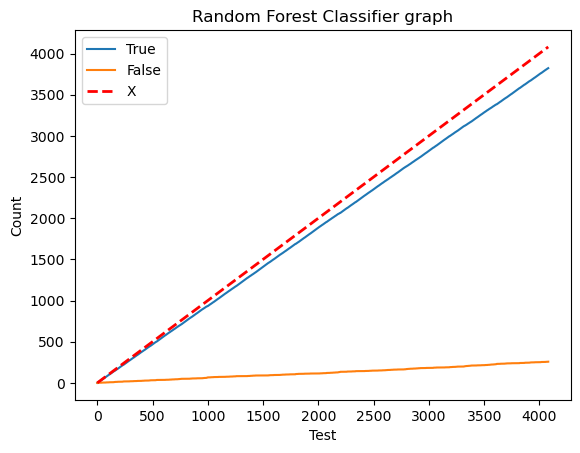

In [45]:
'''Create a plot representing the cumulative counts of TRUE values, 
FALSE values, and the values for a 100% accuracy at each step during 
the evaluation of the random forest classifier'''
plt.plot(graph_T_RFC, label='True')
plt.plot(graph_F_RFC, label='False')
plt.plot(graph_X_RFC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('Random Forest Classifier graph')
plt.show()

In [46]:
# Add the data to data result
data_result.append(['Random Forest Classifier', accuracy])

### SVM (Support_Vector_Machine)

Create and train the Support vector machine

In [47]:
from sklearn.svm import SVC
Support_Vector_Machine_C = SVC()
Support_Vector_Machine_C.fit(X_train, y_train) #We fit X_train and y_train

SVC()

Make predictions on the test set

In [48]:
#Using the Support Vector Machine (SVM) Classifier we predict values based on X_test
predictions_SVC = Support_Vector_Machine_C.predict(X_test) 

In [49]:
TorF_SVC = [] #Create the list TorF_SVC
for i in range(len(predictions_SVC)):
    '''For each value from predictions_SVC 
  if the value is egal to true label we add the string 'TRUE' to TorF_SVC
  if the value is not egal to the true label we add the string 'FALSE' to TorF_SVC'''
    if (y_test[i]==predictions_SVC[i]):
        TorF_SVC.append('TRUE')
    if (y_test[i]!=predictions_SVC[i]):
        TorF_SVC.append('FALSE')

In [50]:
#We create the dataframe "result_df_SVC" with 3 columns
result_df_SVC = pd.DataFrame({
    'True Values': y_test, #The first column is "True values" which contains the true labels
    'Predictions': predictions_SVC, #The second column is "Predictions" which contains the predictions made by the SVM Classifier
    'Results': TorF_SVC #The last column is "Results" which contains the values from TorF_SVC
})

print(result_df_SVC) #We print the dataframe "result_df_SVC"

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         15.0    TRUE
3            57.0         21.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0         46.0   FALSE
4076         57.0         38.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0         49.0    TRUE
4079         15.0         15.0    TRUE

[4080 rows x 3 columns]


Evaluate the classifier

In [51]:
'''We create three lists (graph_T_SVC, graph_F_SVC, and graph_X_SVC) 
    and three counters (graph_T0_SVC, graph_F0_SVC, and graph_X0_SVC) 
    to track the cumulative count of true positives, false positives, 
    and total predictions at each step of iterating through the predictions 
    made by the SVM classifier (predictions_SVC)'''
graph_T_SVC = []
graph_F_SVC = []
graph_X_SVC = []
graph_T0_SVC = 0
graph_F0_SVC = 0
graph_X0_SVC = 0
for i in range(len(predictions_SVC)):
    if (y_test[i]==predictions_SVC[i]):
        graph_T0_SVC +=1
        graph_X0_SVC +=1
        graph_T_SVC.append(graph_T0_SVC)
        graph_F_SVC.append(graph_F0_SVC)
        graph_X_SVC.append(graph_X0_SVC)
    if (y_test[i]!=predictions_SVC[i]):
        graph_F0_SVC +=1
        graph_X0_SVC +=1
        graph_T_SVC.append(graph_T0_SVC)
        graph_F_SVC.append(graph_F0_SVC)
        graph_X_SVC.append(graph_X0_SVC)

In [52]:
print("True :",graph_T0_SVC) #Print the number of TRUE values
print("False :",graph_F0_SVC) #Print the number of FALSE values
print("X :",graph_X0_SVC) #Print the number of TRUE values in the case of a 100% accuracy
'''We calculate the accuracy of the SVM classifier based on the cumulative counts 
of TRUE values (graph_T0_SVC) and FALSE values (graph_F0_SVC)'''
acc_SVC = graph_T0_SVC * 100 / (graph_T0_SVC + graph_F0_SVC)
print('acc_SVC :',f'{acc_SVC:.2f}%') #Print the accuracy

True : 3222
False : 858
X : 4080
acc_SVC : 78.97%


In [53]:
accuracy = accuracy_score(y_test, predictions_SVC) #Calculate the accuracy by comparing the true labels with the predicted labels
conf_matrix = confusion_matrix(y_test, predictions_SVC) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, predictions_SVC) #Create the classification report that display the precision, recall, F1-score and support for each class

In [54]:
# Display evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.79

Confusion Matrix:
[[57  1  0 ...  0  0  0]
 [ 1 49  2 ...  0  0  0]
 [ 5  1 51 ...  0  0  0]
 ...
 [ 1  0  0 ... 58  1  1]
 [ 2  0  2 ...  0 60  0]
 [ 0  0  0 ...  0  0 62]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.48      0.79      0.60        72
         3.0       0.89      0.71      0.79        69
         4.0       0.84      0.70      0.76        73
         5.0       0.82      0.85      0.83        73
         7.0       0.69      0.70      0.70        54
         8.0       0.91      0.57      0.70        87
        10.0       0.82      0.82      0.82        97
        11.0       0.95      0.81      0.88        75
        12.0       0.99      0.83      0.90        93
        13.0       0.95      0.81      0.87        72
        15.0       0.80      0.76      0.78        87
        16.0       0.65      0.86      0.74        85
        17.0       0.92      0.88      0.90        82
        18

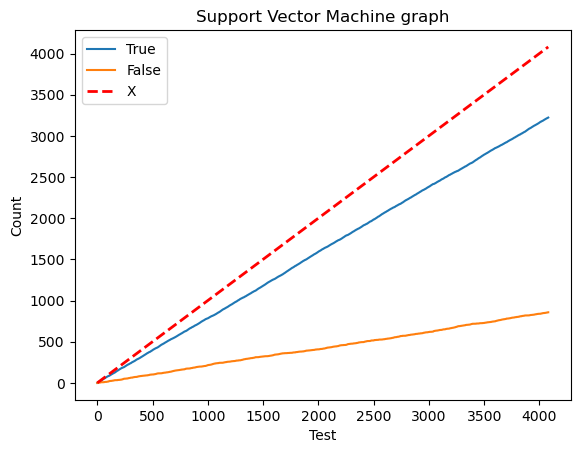

In [55]:
'''Create a plot representing the cumulative counts of TRUE values, 
FALSE values, and the values for a 100% accuracy at each step during 
the evaluation of the SVM classifier'''
plt.plot(graph_T_SVC, label='True')
plt.plot(graph_F_SVC, label='False')
plt.plot(graph_X_RFC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('Support Vector Machine graph')
plt.show()

In [56]:
# Add the data to data result
data_result.append(['SVM', accuracy])

### KNN (K-Nearest Neighbors)

Create and train the KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5) #We define the KNN classifier 5 neighbors
KNN.fit(X_train, y_train) #We fit X_train and y_train

KNeighborsClassifier()

Make predictions on the test set

In [58]:
#Using the KNN classifier we predict values based on X_test
predictions_KNN = KNN.predict(X_test)

In [59]:
TorF_KNN = [] #Create the list TorF_KNN
for i in range(len(predictions_KNN)):
    '''For each value from predictions_KNN 
  if the value is egal to true label we add the string 'TRUE' to TorF_KNN
  if the value is not egal to the true label we add the string 'FALSE' to TorF_KNN'''
    if (y_test[i]==predictions_KNN[i]):
        TorF_KNN.append('TRUE')
    if (y_test[i]!=predictions_KNN[i]):
        TorF_KNN.append('FALSE')

In [60]:
#We create the dataframe "result_df_KNN" with 3 columns
result_df_KNN = pd.DataFrame({
    'True Values': y_test, #The first column is "True values" which contains the true labels
    'Predictions': predictions_KNN, #The second column is "Predictions" which contains the predictions made by the KNN classifier
    'Results': TorF_KNN #The last column is "Results" which contains the values from TorF_KNN
})

print(result_df_KNN) #We print the dataframe "result_df_KNN"

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         15.0    TRUE
3            57.0         21.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0         38.0   FALSE
4076         57.0         28.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0         49.0    TRUE
4079         15.0         15.0    TRUE

[4080 rows x 3 columns]


Evaluate the classifier

In [61]:
'''We create three lists (graph_T_KNN, graph_F_KNN, and graph_X_KNN) 
    and three counters (graph_T0_KNN, graph_F0_KNN, and graph_X0_KNN) 
    to track the cumulative count of true positives, false positives, 
    and total predictions at each step of iterating through the predictions 
    made by the KNN classifier (predictions_KNN)'''
graph_T_KNN = []
graph_F_KNN = []
graph_X_KNN = []
graph_T0_KNN = 0
graph_F0_KNN = 0
graph_X0_KNN = 0
for i in range(len(predictions_KNN)):
    if (y_test[i]==predictions_KNN[i]):
        graph_T0_KNN +=1
        graph_X0_KNN +=1
        graph_T_KNN.append(graph_T0_KNN)
        graph_F_KNN.append(graph_F0_KNN)
        graph_X_KNN.append(graph_X0_KNN)
    if (y_test[i]!=predictions_KNN[i]):
        graph_F0_KNN +=1
        graph_X0_KNN +=1
        graph_T_KNN.append(graph_T0_KNN)
        graph_F_KNN.append(graph_F0_KNN)
        graph_X_KNN.append(graph_X0_KNN)

In [62]:
print("True :",graph_T0_KNN) #Print the number of TRUE values
print("False :",graph_F0_KNN) #Print the number of FALSE values
print("X :",graph_X0_KNN) #Print the number of TRUE values in the case of a 100% accuracy
'''We calculate the accuracy of the KNN classifier based on the cumulative counts 
of TRUE values (graph_T0_KNN) and FALSE values (graph_F0_KNN)'''
acc_KNN = graph_T0_KNN * 100 / (graph_T0_KNN + graph_F0_KNN)
print('acc_KNN :',f'{acc_KNN:.2f}%') #Print the accuracy

True : 3015
False : 1065
X : 4080
acc_KNN : 73.90%


In [63]:
predictions_RFC
accuracy = accuracy_score(y_test, predictions_KNN) #Calculate the accuracy by comparing the true labels wiith the predicted labels
conf_matrix = confusion_matrix(y_test, predictions_KNN) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, predictions_KNN) #Create the classification report that display the precision, recall, F1-score and support for each class

In [64]:
# Display evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.74

Confusion Matrix:
[[45  0  7 ...  0  0  0]
 [ 1 46  4 ...  0  0  0]
 [ 8  3 49 ...  0  0  0]
 ...
 [ 0  1  0 ... 55  4  0]
 [ 3  1  2 ...  0 57  0]
 [ 1  0  0 ...  1  0 49]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.35      0.62      0.45        72
         3.0       0.69      0.67      0.68        69
         4.0       0.52      0.67      0.59        73
         5.0       0.69      0.84      0.76        73
         7.0       0.53      0.74      0.62        54
         8.0       0.68      0.74      0.71        87
        10.0       0.83      0.84      0.83        97
        11.0       0.89      0.73      0.80        75
        12.0       0.95      0.81      0.87        93
        13.0       0.64      0.71      0.67        72
        15.0       0.73      0.72      0.73        87
        16.0       0.54      0.79      0.64        85
        17.0       0.75      0.89      0.82        82
        18

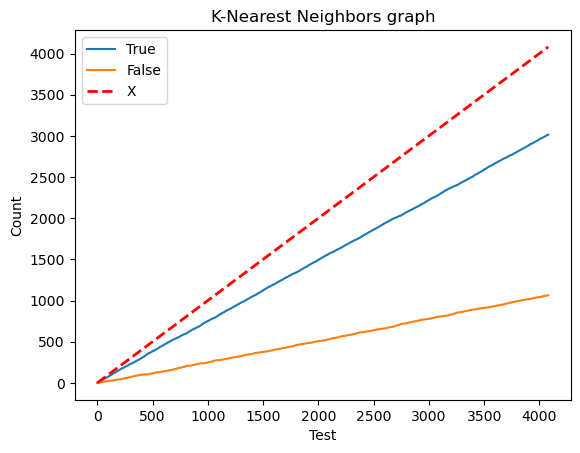

In [65]:
'''Create a plot representing the cumulative counts of TRUE values, 
FALSE values, and the values for a 100% accuracy at each step during 
the evaluation of the KNN classifier.'''
plt.plot(graph_T_KNN, label='True')
plt.plot(graph_F_KNN, label='False')
plt.plot(graph_X_RFC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('K-Nearest Neighbors graph')
plt.show()

In [66]:
# Add the data to data result
data_result.append(['KNN', accuracy])

### NBC (Naive Bayes Classifier)

Create and train the NBC

In [67]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train) #We fit X_train and y_train

GaussianNB()

Make a prediction

In [68]:
#Using the NBC we predict values based on X_test
predictions_NBC = NBC.predict(X_test)

In [69]:
TorF_NBC = [] #Create the list TorF_NBC
for i in range(len(predictions_NBC)):
    '''For each value from predictions_NBC 
  if the value is egal to true label we add the string 'TRUE' to TorF_NBC
  if the value is not egal to the true label we add the string 'FALSE' to TorF_NBC'''
    if (y_test[i]==predictions_NBC[i]):
        TorF_NBC.append('TRUE')
    if (y_test[i]!=predictions_NBC[i]):
        TorF_NBC.append('FALSE')

In [70]:
#We create the dataframe "result_df_NBC" with 3 columns
result_df_NBC = pd.DataFrame({
    'True Values': y_test, #The first column is "True values" which contains the true labels
    'Predictions': predictions_NBC, #The second column is "Predictions" which contains the predictions made by the NBC
    'Results': TorF_NBC #The last column is "Results" which contains the values from TorF_NBC
})

print(result_df_NBC) #We print the dataframe "result_df_NBC"

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         29.0   FALSE
3            57.0         21.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0         30.0   FALSE
4076         57.0         37.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0          5.0   FALSE
4079         15.0         15.0    TRUE

[4080 rows x 3 columns]


Evaluate the classifier

In [71]:
'''We create three lists (graph_T_NBC, graph_F_NBC, and graph_X_NBC) 
    and three counters (graph_T0_NBC, graph_F0_NBC, and graph_X0_NBC) 
    to track the cumulative count of true positives, false positives, 
    and total predictions at each step of iterating through the predictions 
    made by the NBC (predictions_NBC)'''
graph_T_NBC = []
graph_F_NBC = []
graph_X_NBC = []
graph_T0_NBC = 0
graph_F0_NBC = 0
graph_X0_NBC = 0
for i in range(len(predictions_NBC)):
    if (y_test[i]==predictions_NBC[i]):
        graph_T0_NBC +=1
        graph_X0_NBC +=1
        graph_T_NBC.append(graph_T0_NBC)
        graph_F_NBC.append(graph_F0_NBC)
        graph_X_NBC.append(graph_X0_NBC)
    if (y_test[i]!=predictions_NBC[i]):
        graph_F0_NBC +=1
        graph_X0_NBC +=1
        graph_T_NBC.append(graph_T0_NBC)
        graph_F_NBC.append(graph_F0_NBC)
        graph_X_NBC.append(graph_X0_NBC)

In [72]:
print("True :",graph_T0_NBC) #Print the number of TRUE values
print("False :",graph_F0_NBC) #Print the number of FALSE values
print("X :",graph_X0_NBC) #Print the number of TRUE values in the case of a 100% accuracy
'''We calculate the accuracy of the NBC based on the cumulative counts 
of TRUE values (graph_T0_NBC) and FALSE values (graph_F0_NBC)'''
acc_NBC = graph_T0_NBC * 100 / (graph_T0_NBC + graph_F0_NBC)
print('acc_NBC :',f'{acc_NBC:.2f}%') #Print the accuracy

True : 2718
False : 1362
X : 4080
acc_NBC : 66.62%


In [73]:
predictions_RFC
accuracy = accuracy_score(y_test, predictions_NBC) #Calculate the accuracy by comparing the true labels with the predicted labels
conf_matrix = confusion_matrix(y_test, predictions_NBC) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, predictions_NBC) #Create the classification report that display the precision, recall, F1-score and support for each class

In [74]:
# Display evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.67

Confusion Matrix:
[[30  1  0 ...  0  1  0]
 [ 1 48  3 ...  0  1  0]
 [ 4  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  6  0]
 [ 8  0  0 ...  7 47  2]
 [ 1  0  0 ...  1  3 61]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.21      0.42      0.28        72
         3.0       0.75      0.70      0.72        69
         4.0       0.59      0.78      0.67        73
         5.0       0.62      0.82      0.71        73
         7.0       0.36      0.65      0.47        54
         8.0       0.34      0.69      0.45        87
        10.0       0.87      0.80      0.83        97
        11.0       0.58      0.83      0.69        75
        12.0       0.65      0.77      0.71        93
        13.0       0.55      0.83      0.66        72
        15.0       0.82      0.54      0.65        87
        16.0       0.64      0.73      0.68        85
        17.0       0.81      0.91      0.86        82
        18

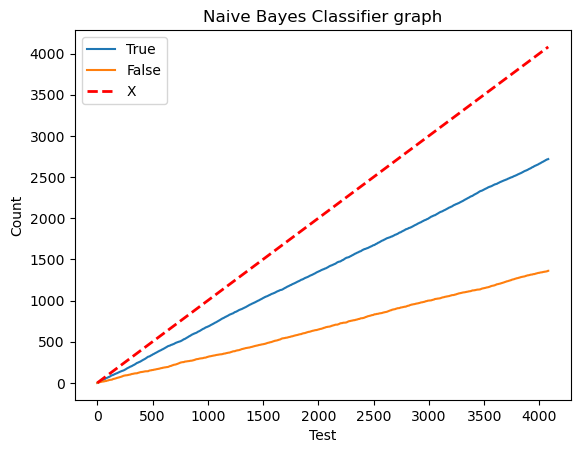

In [75]:
'''Create a plot representing the cumulative counts of TRUE values, 
FALSE values, and the values for a 100% accuracy at each step during 
the evaluation of the NBC'''
plt.plot(graph_T_NBC, label='True')
plt.plot(graph_F_NBC, label='False')
plt.plot(graph_X_RFC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('Naive Bayes Classifier graph')
plt.show()

In [76]:
# Add the data to data result
data_result.append(['NBC', accuracy])

### MLPclassifier

Create and train the MLP

In [77]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier() #We define the MLP classifier

MLP.fit(X_train, y_train) #We fit X_train and y_train

C:\Users\anton\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

Make a prediction

In [78]:
#Using the MLP classifier we predict values based on X_test_scaled
predictions_MLP = MLP.predict(X_test)

Evaluate the classifier

In [79]:
TorF_MLP = []
for i in range(len(predictions_MLP)):
    if (y_test[i]==predictions_MLP[i]):
        TorF_MLP.append('TRUE')
    if (y_test[i]!=predictions_MLP[i]):
        TorF_MLP.append('FALSE')

In [80]:
result_df_MLP = pd.DataFrame({
    'True Values': y_test,
    'Predictions': predictions_MLP,
    'Results': TorF_MLP
})

print(result_df_MLP)

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         15.0    TRUE
3            57.0         21.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0          3.0   FALSE
4076         57.0         56.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0         49.0    TRUE
4079         15.0         15.0    TRUE

[4080 rows x 3 columns]


In [82]:
predictions_RFC
accuracy = accuracy_score(y_test, predictions_MLP) #Calculate the accuracy by comparing the true labels wiith the predicted labels
conf_matrix = confusion_matrix(y_test, predictions_MLP) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, predictions_MLP) #Create the classification report that display the precision, recall, F1-score and support for each class

In [83]:
# Display evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.91

Confusion Matrix:
[[60  0  1 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  1 67 ...  0  0  0]
 ...
 [ 1  0  0 ... 62  1  0]
 [ 0  0  0 ...  1 76  0]
 [ 0  0  0 ...  0  2 80]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.71      0.83      0.77        72
         3.0       0.87      0.84      0.85        69
         4.0       0.91      0.92      0.91        73
         5.0       0.96      0.93      0.94        73
         7.0       0.78      0.78      0.78        54
         8.0       0.86      0.87      0.87        87
        10.0       0.98      0.94      0.96        97
        11.0       0.92      0.91      0.91        75
        12.0       0.95      0.88      0.92        93
        13.0       0.95      0.97      0.96        72
        15.0       0.93      0.93      0.93        87
        16.0       0.89      0.94      0.91        85
        17.0       0.99      0.98      0.98        82
        18

In [84]:
graph_T_MLP = []
graph_F_MLP = []
graph_X_MLP = []
graph_T0_MLP = 0
graph_F0_MLP = 0
graph_X0_MLP = 0
for i in range(len(predictions_MLP)):
    if (y_test[i]==predictions_MLP[i]):
        graph_T0_MLP +=1
        graph_X0_MLP +=1
        graph_T_MLP.append(graph_T0_MLP)
        graph_F_MLP.append(graph_F0_MLP)
        graph_X_MLP.append(graph_X0_MLP)
    if (y_test[i]!=predictions_MLP[i]):
        graph_F0_MLP +=1
        graph_X0_MLP +=1
        graph_T_MLP.append(graph_T0_MLP)
        graph_F_MLP.append(graph_F0_MLP)
        graph_X_MLP.append(graph_X0_MLP)

In [85]:
print("True :",graph_T0_MLP)
print("False :",graph_F0_MLP)
print("X :",graph_X0_MLP)
acc_MLP = graph_T0_MLP * 100 / (graph_T0_MLP + graph_F0_MLP)
print('acc_MLP :',f'{acc_MLP:.2f}%')

True : 3729
False : 351
X : 4080
acc_MLP : 91.40%


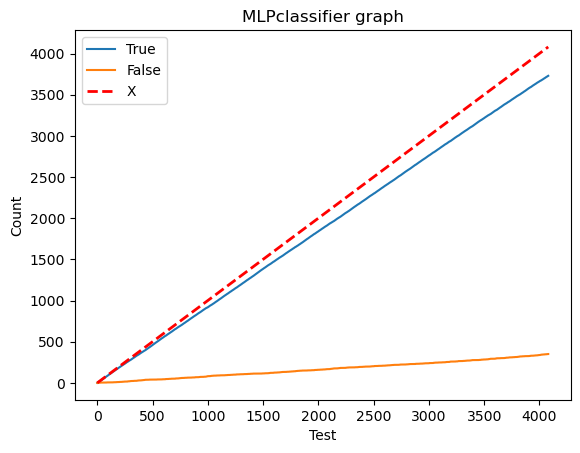

In [86]:
plt.plot(graph_T_MLP, label='True')
plt.plot(graph_F_MLP, label='False')
plt.plot(graph_X_MLP, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('MLPclassifier graph')
plt.show()

In [87]:
# Add the data to data result
data_result.append(['MLPClassifier', accuracy])

### GBC (GradientBoostingClassifier)


Create the gradient boosting classifier

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier with updated hyperparameters
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

We have tested the code with a cross validation but it was very time consuming it is why we've deleted it. Nontheless, here the results we've obtained with a cross validaiton


Cross-Validation Scores: [0.91339869 0.91230937 0.92075163 0.91285403 0.91448802]
Mean Accuracy: 0.9147603485838779



Train de model

In [89]:
GBC.fit(X_train, y_train) #We fit X_train and y_train

GradientBoostingClassifier(random_state=0)

Make the prediction

In [90]:
#Using the GBC we predict values based on X_test_scaled
y_pred_GBC = GBC.predict(X_test)

In [91]:
TorF_GBC = [] #Create the list TorF_GBC
for i in range(len(y_pred_GBC)):
    '''For each value from predictions_GBC 
  if the value is egal to true label we add the string 'TRUE' to TorF_GBC
  if the value is not egal to the true label we add the string 'FALSE' to TorF_GBC'''
    if (y_test[i]==y_pred_GBC[i]):
        TorF_GBC.append('TRUE')
    if (y_test[i]!=y_pred_GBC[i]):
        TorF_GBC.append('FALSE')

In [92]:
#We create the dataframe "result_df_GBC" with 3 columns
result_df_GBC = pd.DataFrame({
    'True Values': y_test, #The first column is "True values" which contains the true labels
    'Predictions': y_pred_GBC, #The second column is "Predictions" which contains the predictions made by the GBC
    'Results': TorF_GBC #The last column is "Results" which contains the values from TorF_GBC
})

print(result_df_GBC) #We print the dataframe "result_df_GBC"

      True Values  Predictions Results
0            12.0         12.0    TRUE
1            29.0         29.0    TRUE
2            15.0         15.0    TRUE
3            57.0         21.0   FALSE
4            53.0         53.0    TRUE
...           ...          ...     ...
4075         41.0         41.0    TRUE
4076         57.0         38.0   FALSE
4077         21.0         21.0    TRUE
4078         49.0         49.0    TRUE
4079         15.0         15.0    TRUE

[4080 rows x 3 columns]


In [93]:
'''We create three lists (graph_T_GBC, graph_F_GBC, and graph_X_GBC) 
    and three counters (graph_T0_GBC, graph_F0_GBC, and graph_X0_GBC) 
    to track the cumulative count of true positives, false positives, 
    and total predictions at each step of iterating through the predictions 
    made by the GBC (predictions_GBC)'''
graph_T_GBC = []
graph_F_GBC = []
graph_X_GBC = []
graph_T0_GBC = 0
graph_F0_GBC = 0
graph_X0_GBC = 0
for i in range(len(y_pred_GBC)):
    if (y_test[i]==y_pred_GBC[i]):
        graph_T0_GBC +=1
        graph_X0_GBC +=1
        graph_T_GBC.append(graph_T0_GBC)
        graph_F_GBC.append(graph_F0_GBC)
        graph_X_GBC.append(graph_X0_GBC)
    if (y_test[i]!=y_pred_GBC[i]):
        graph_F0_GBC +=1
        graph_X0_GBC +=1
        graph_T_GBC.append(graph_T0_GBC)
        graph_F_GBC.append(graph_F0_GBC)
        graph_X_GBC.append(graph_X0_GBC)

In [94]:
print("True :",graph_T0_GBC) #Print the number of TRUE values
print("False :",graph_F0_GBC) #Print the number of FALSE values
print("X :",graph_X0_GBC) #Print the number of TRUE values in the case of a 100% accuracy
'''We calculate the accuracy of the GBC based on the cumulative counts 
of TRUE values (graph_T0_GBC) and FALSE values (graph_F0_GBC)'''
acc_GBC = graph_T0_GBC * 100 / (graph_T0_GBC + graph_F0_GBC)
print('acc_NBC :',f'{acc_GBC:.2f}%') #Print the accuracy

True : 3767
False : 313
X : 4080
acc_NBC : 92.33%


In [95]:
accuracy = accuracy_score(y_test, y_pred_GBC) #Calculate the accuracy by comparing the true labels wiith the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_GBC) #Generate the confusion matrix for the classifier
classification_rep = classification_report(y_test, y_pred_GBC) #Create the classification report that display the precision, recall, F1-score and support for each class

In [96]:
# Display evaluation results
print("\nModel Evaluation:") 
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation:
Accuracy: 0.92

Confusion Matrix:
[[62  0  1 ...  0  0  0]
 [ 0 59  2 ...  0  0  0]
 [ 2  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  4  0]
 [ 0  0  1 ...  2 72  0]
 [ 0  0  0 ...  0  0 81]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.79      0.86      0.83        72
         3.0       0.92      0.86      0.89        69
         4.0       0.89      0.92      0.91        73
         5.0       0.96      0.95      0.95        73
         7.0       0.78      0.87      0.82        54
         8.0       0.89      0.87      0.88        87
        10.0       0.93      0.97      0.95        97
        11.0       0.95      0.93      0.94        75
        12.0       0.94      0.86      0.90        93
        13.0       0.99      0.93      0.96        72
        15.0       0.95      0.86      0.90        87
        16.0       0.95      0.99      0.97        85
        17.0       0.98      0.96      0.97        82
        18

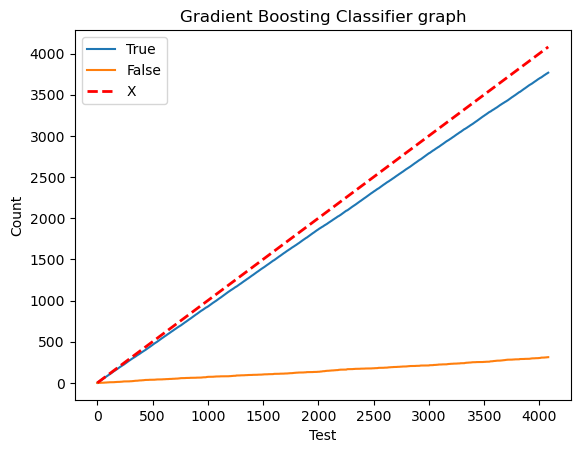

In [97]:
'''Create a plot representing the cumulative counts of TRUE values, 
FALSE values, and the values for a 100% accuracy at each step during 
the evaluation of the GBC'''
plt.plot(graph_T_GBC, label='True')
plt.plot(graph_F_GBC, label='False')
plt.plot(graph_X_RFC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('Gradient Boosting Classifier graph')
plt.show()

In [98]:
# Add the data to data result
data_result.append(['GBC', accuracy])

## Compare

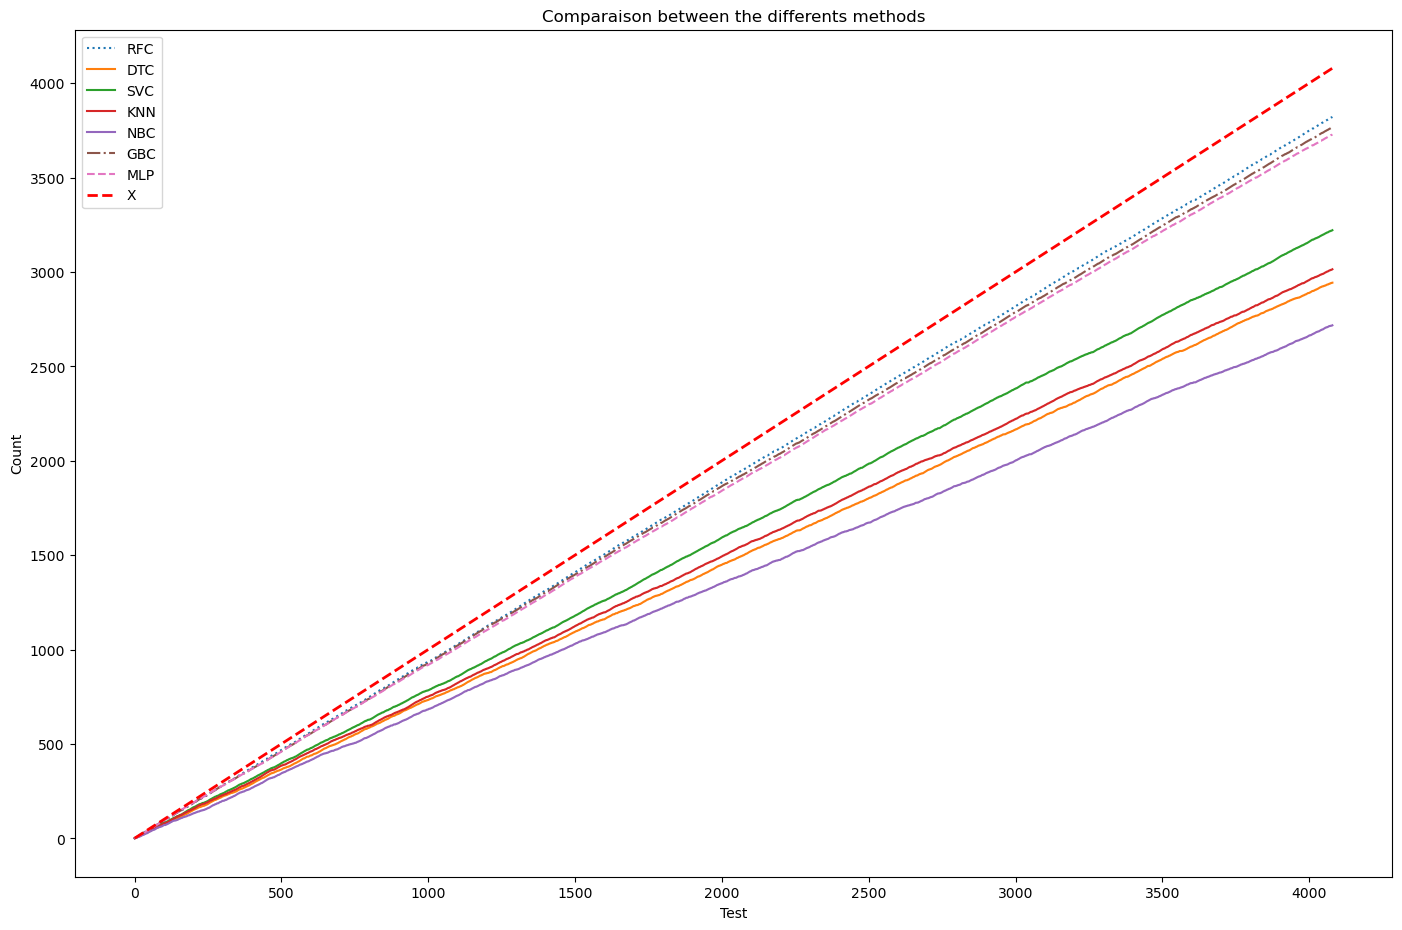

In [99]:
#This plot show the performance of the methods we've compute previously
plt.figure(figsize=(17, 11))
plt.plot(graph_T_RFC, label='RFC', linestyle=':')
plt.plot(graph_T_DTC, label='DTC')
plt.plot(graph_T_SVC, label='SVC')
plt.plot(graph_T_KNN, label='KNN')
plt.plot(graph_T_NBC, label='NBC')
plt.plot(graph_T_GBC, label='GBC', linestyle='-.')
plt.plot(graph_T_MLP, label='MLP', linestyle='--')
plt.plot(graph_X_RFC, label='X', linestyle='--', linewidth=2, color='red')
plt.xlabel('Test')
plt.ylabel('Count')
plt.legend()
plt.title('Comparaison between the differents methods')
plt.show()

In [100]:
# Convert List of Lists to DataFrame
resultats_df = pd.DataFrame(data_result, columns=['Modèle', 'Accuracy'])
print(resultats_df)

                     Modèle  Accuracy
0  Decision Tree Classifier  0.721569
1  Random Forest Classifier  0.936765
2                       SVM  0.789706
3                       KNN  0.738971
4                       NBC  0.666176
5             MLPClassifier  0.913971
6                       GBC  0.923284


In [101]:
method_list = [decision_tree_classifier, randomforestC, Support_Vector_Machine_C, KNN, NBC, GBC, MLP] #List containing the name of the methods

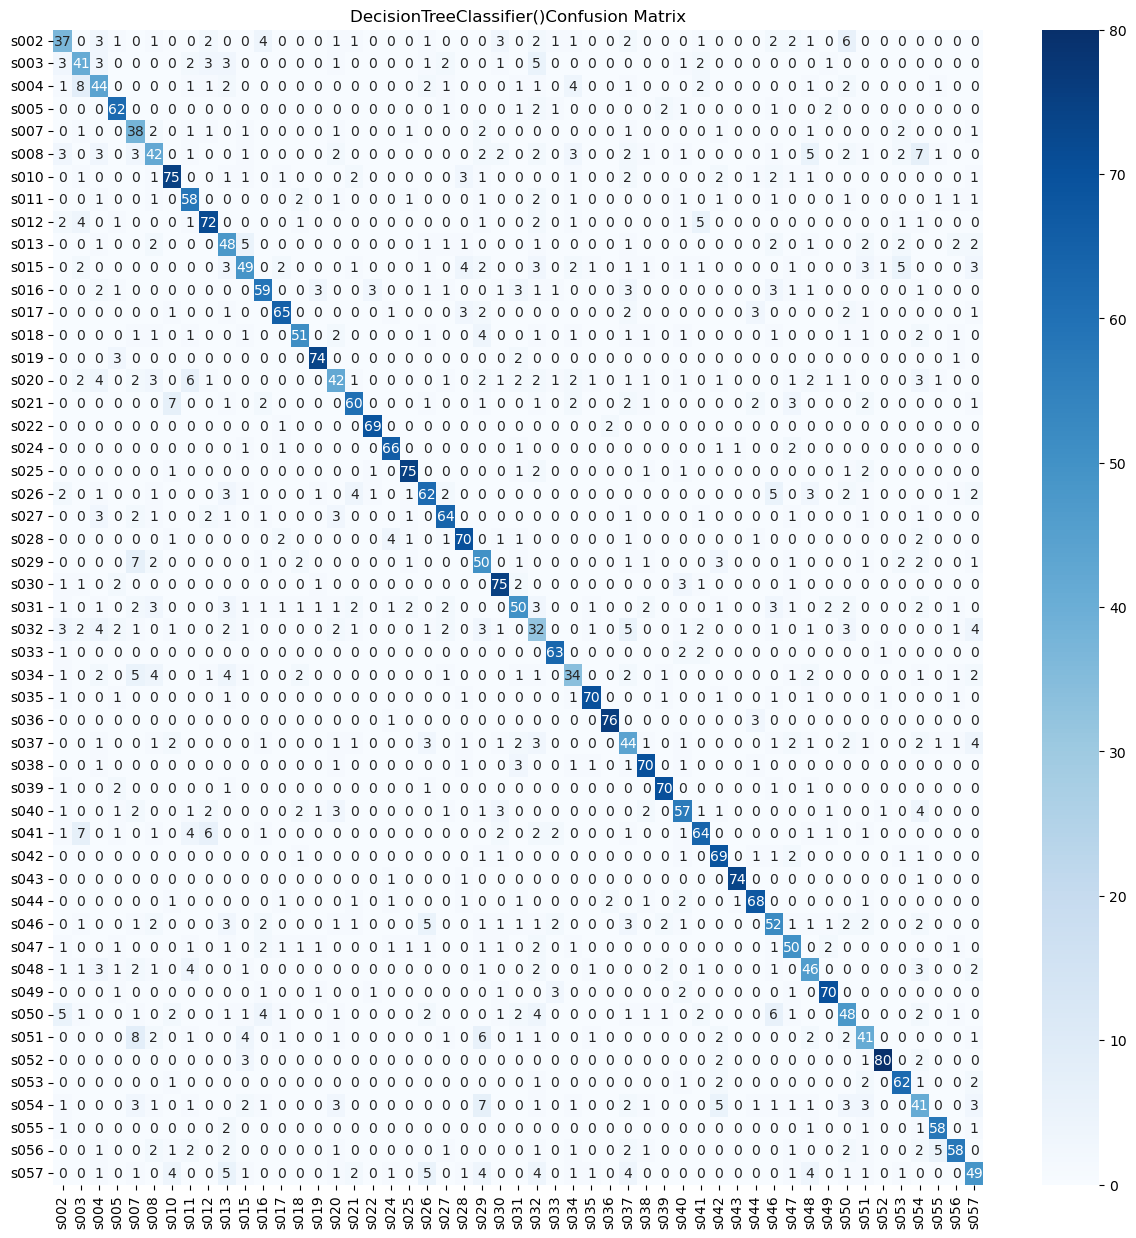

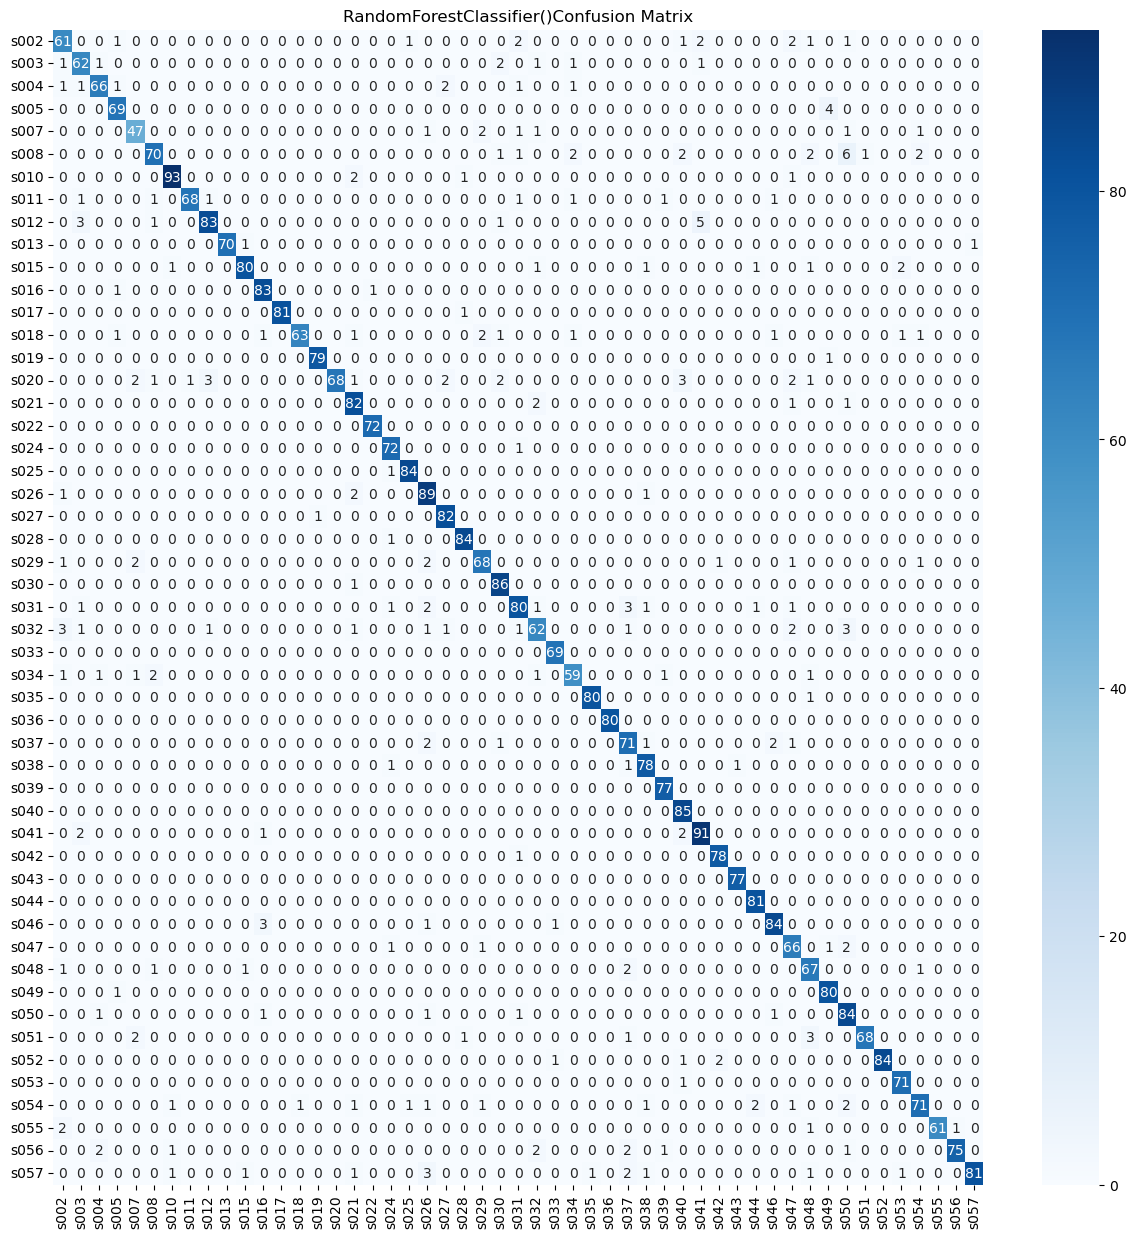

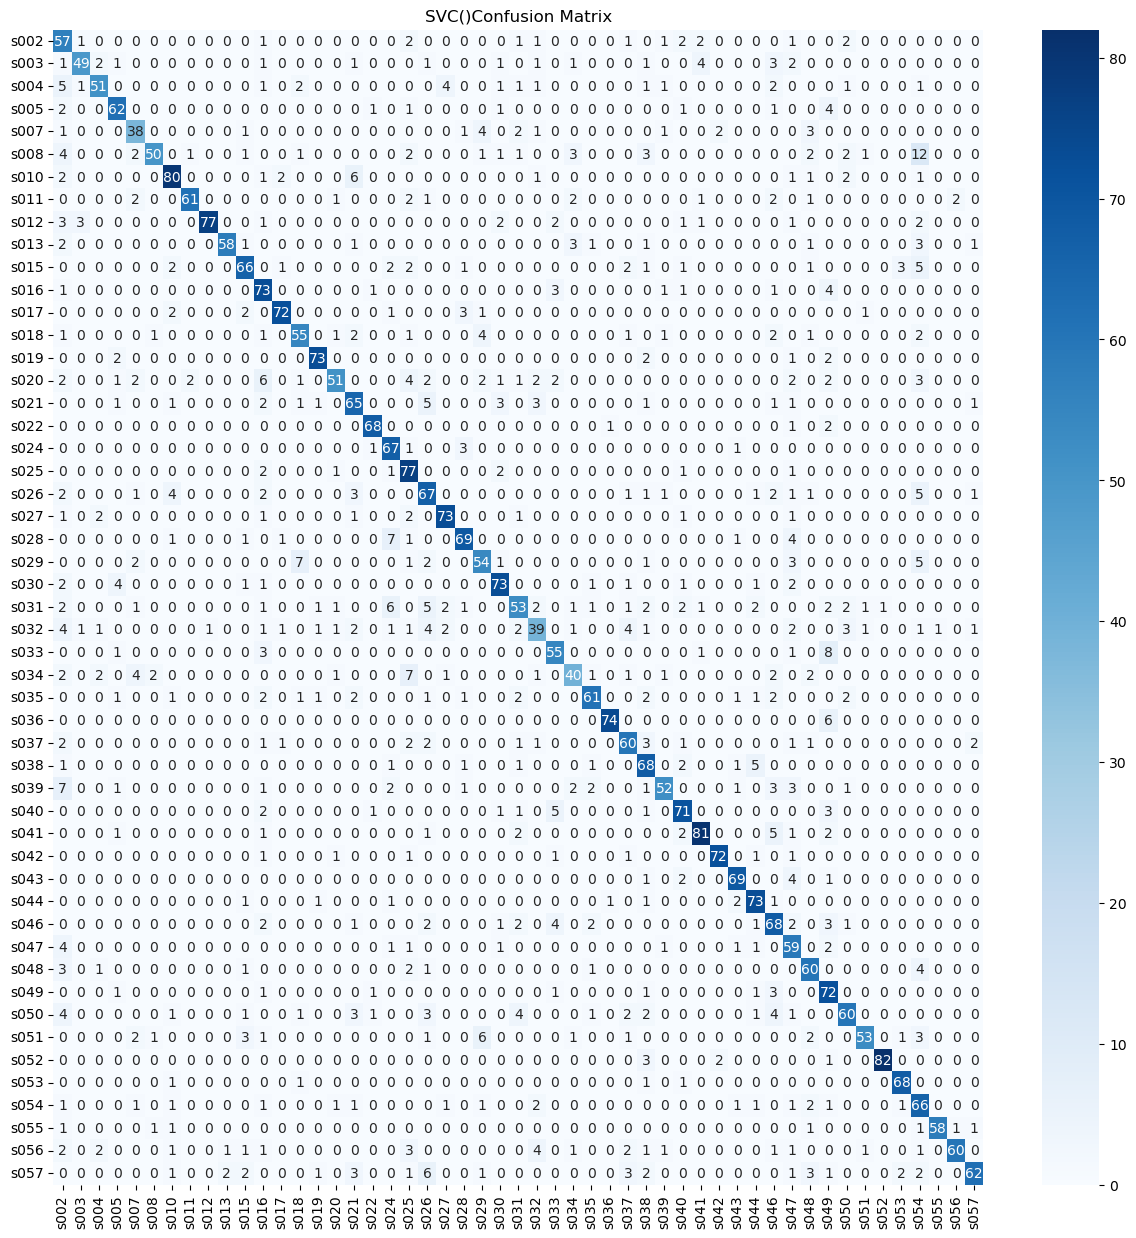

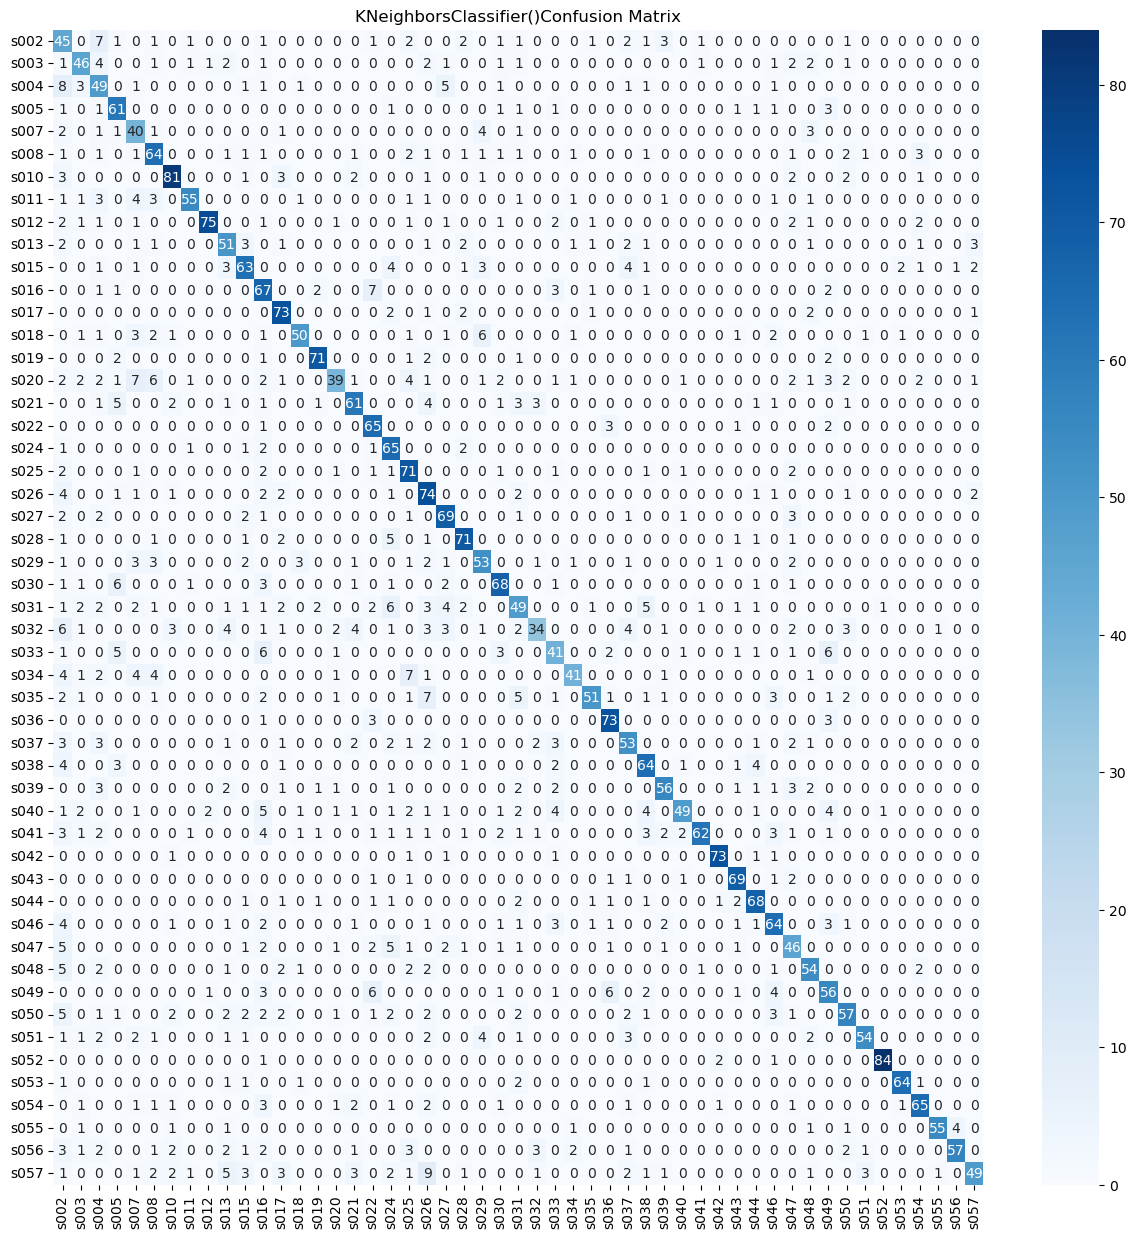

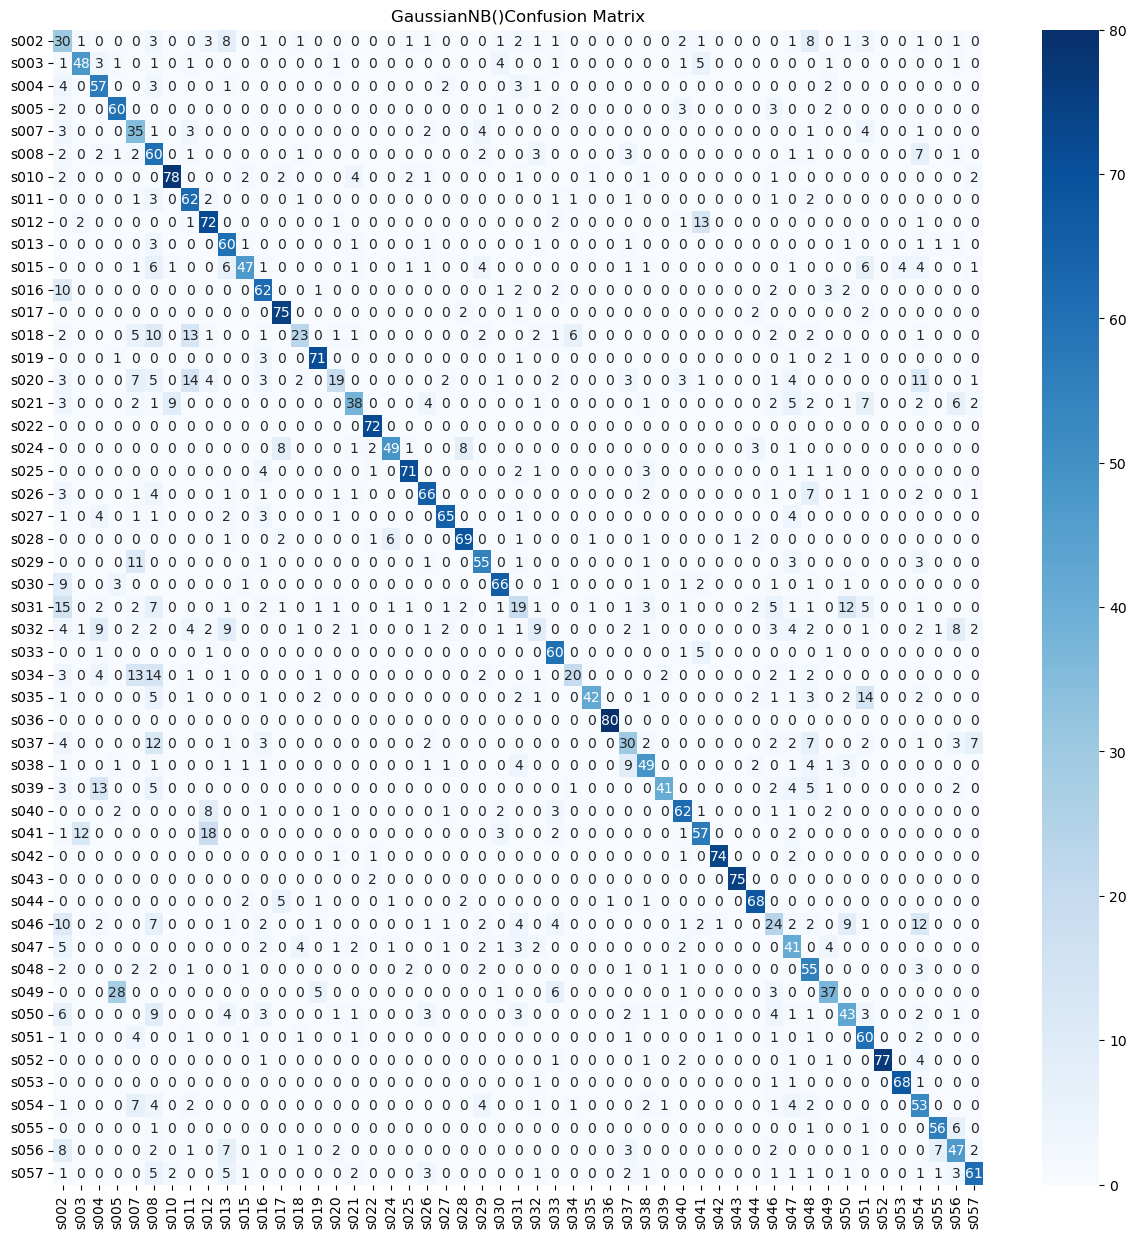

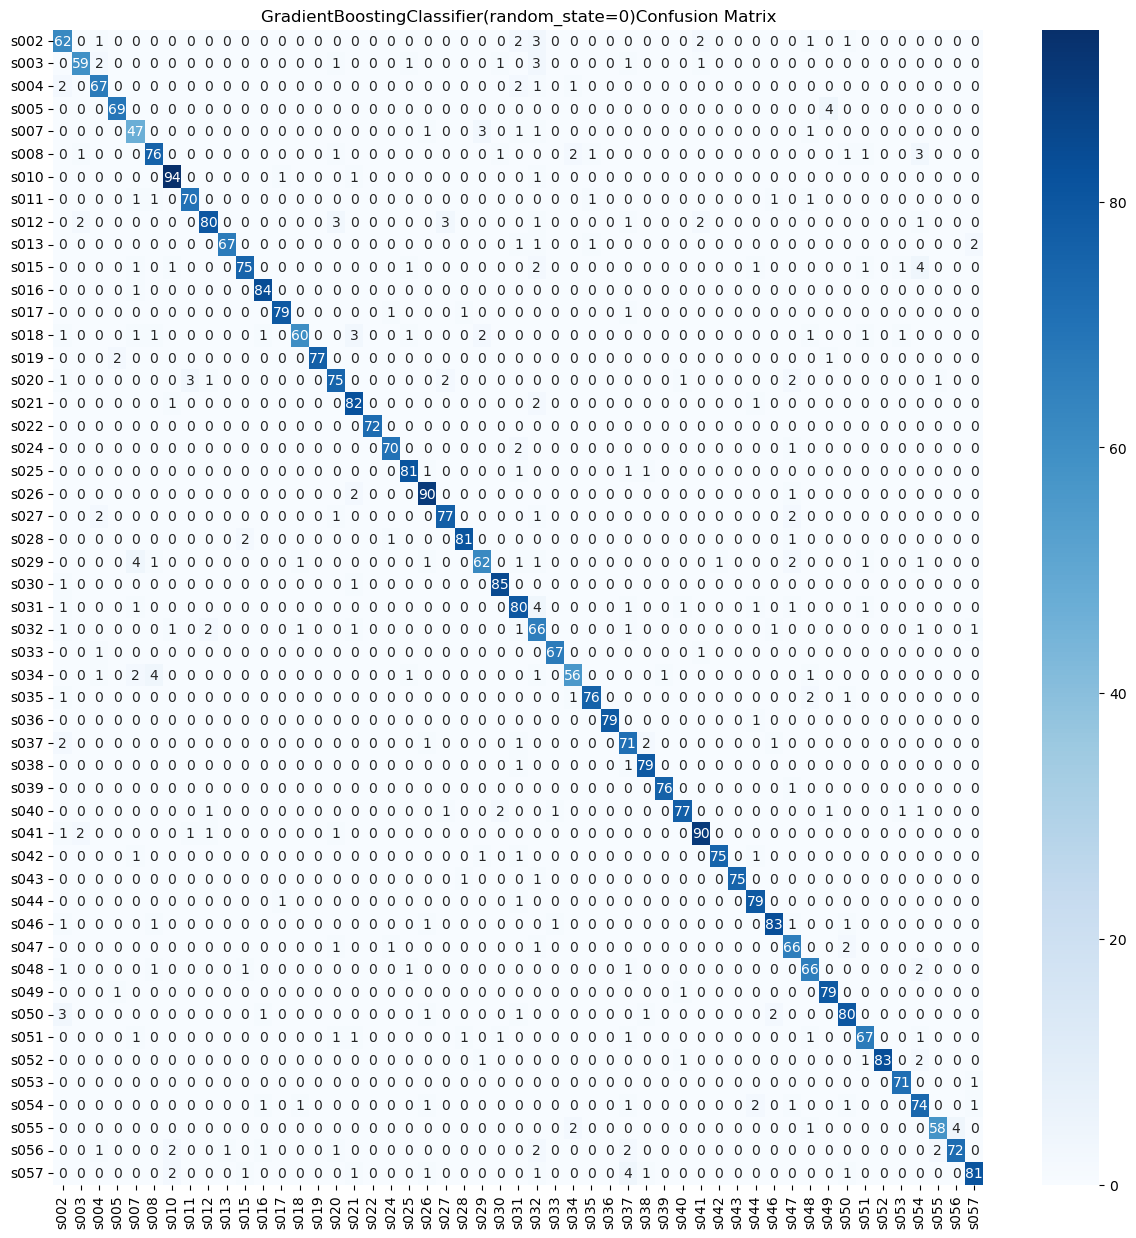

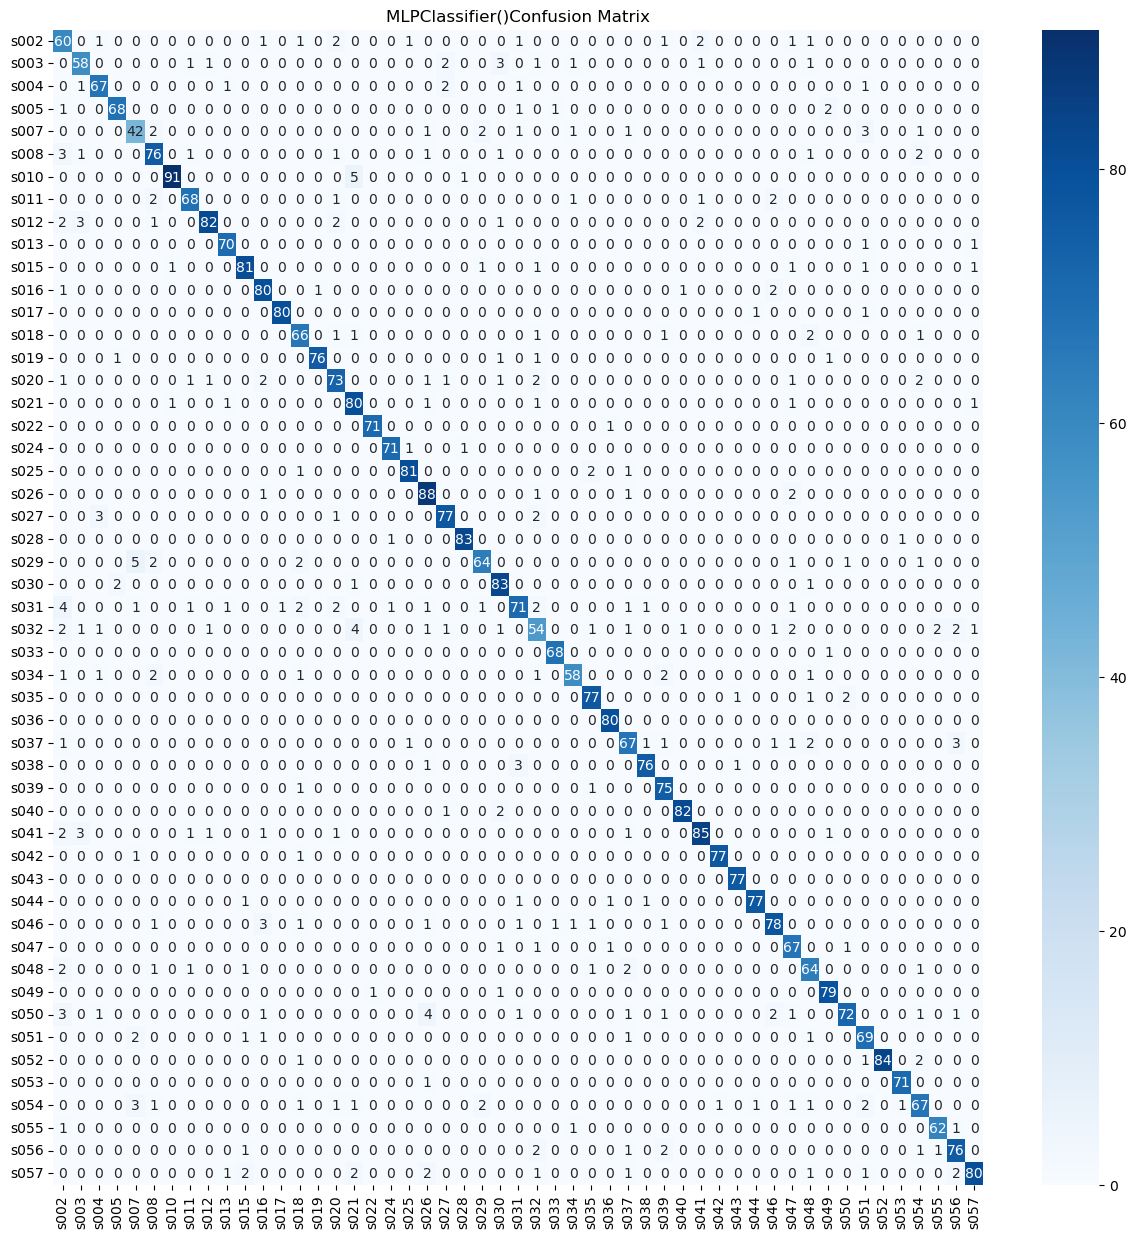

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
target = df['subject']
for i in range(len(method_list)):
    '''We create and visualize the confusion matrices for multiple machine learning models contained in the list method_list'''
    y_pred = method_list[i].predict(X_test)
    # Assuming y_test and y_pred_svm are the true labels and predicted labels for your test set
    cm_svm = confusion_matrix(y_test, y_pred)

    # If 'target' is your target variable, use unique values as classes
    classes = target.unique()

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(str(method_list[i]) + 'Confusion Matrix')
    plt.show()